In [7]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import Input, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D as Conv2D, MaxPooling2D as MaxPool2D
from tensorflow.keras.layers import BatchNormalization as BatchNorm
import numpy as np
import matplotlib.pyplot as plt
from keras_flops import get_flops #alternative to ptflops for tensorflow/keras
#using keras sequential (or maybe functional API) to create models because I dont like pytorch


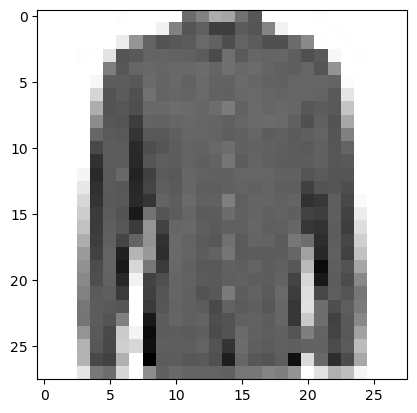

In [8]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()



#bring values between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

plt.imshow(train_images[42069,:,:], cmap='Greys') #display random image

In [9]:
train_images.shape

(60000, 28, 28)

In [10]:
#LeNet default Model for comparison

inputs = Input(shape=(28,28,1))
x = layers.Conv2D(6, kernel_size=5, padding = 'same', activation='sigmoid')(inputs)
x = layers.AveragePooling2D(pool_size=(2,2), strides=(2,2))(x)
x = layers.Conv2D(16, kernel_size=5, activation='relu')(x)
x = layers.AveragePooling2D(pool_size=(2,2), strides=(2,2))(x)
x = layers.Flatten()(x)
x = layers.Dense(120, activation='sigmoid')(x)
x = layers.Dense(84, activation='sigmoid')(x)
outputs = layers.Dense(10)(x)   

LeNet = tf.keras.Model(inputs, outputs)

LeNet.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# compile and train model 1.
train_hist = LeNet.fit(train_images, train_labels, 
                       validation_split=0.2,
                       epochs=50,
                       verbose = 0)

LeNet.summary()
test_loss, test_acc = LeNet.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)
flops = get_flops(LeNet, batch_size=1)
print(f"FLOPS: {flops}")

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120 

Problem 1 (20pts)

Let’s modernize LeNet as we did in the lectures. Implement and test the following changes over FashionMNIST

1. Replace the average pooling with max-pooling.
2. Replace the softmax layer with ReLU.
Start training from scratch based on FashinMNIST. Compare the training loss, training accuracy, and validation accuracy against the baseline we did in the lectures.

In [11]:
# LeNet
# Input Layer
# LazyConv2D (k 2, padding 2, w sigmoid)
# AvgPool2D(k 2, stride 2)
# LazyConv2D(k 5, w sigmoid)
# AvgPool2D(k 2, stride 2)
# Flatten
# LazyLinear w sigmoid
# LazyLinear w sigmoid
# LazyLinear (no acti, output shape)

#For Problem 1, assuming 1.2. means replace Sigmoid layer with ReLU as both are activation functions


inputs = Input(shape=(28,28,1))
x = layers.Conv2D(6, kernel_size=5, padding = 'same', activation='relu')(inputs)
x = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = layers.Conv2D(16, kernel_size=5, activation='relu')(x)
x = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = layers.Flatten()(x)
x = layers.Dense(120, activation='relu')(x)
x = layers.Dense(84, activation='relu')(x)
outputs = layers.Dense(10)(x)   

modelp1 = tf.keras.Model(inputs, outputs)

In [12]:
modelp1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# compile and train model 1.
train_hist = modelp1.fit(train_images, train_labels, 
                       validation_split=0.2,
                       epochs=50,
                       verbose = 1)

Epoch 1/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5306 - accuracy: 0.8070 - val_loss: 0.3994 - val_accuracy: 0.8585
Epoch 2/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3632 - accuracy: 0.8691 - val_loss: 0.3471 - val_accuracy: 0.8784
Epoch 3/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3179 - accuracy: 0.8835 - val_loss: 0.3167 - val_accuracy: 0.8867
Epoch 4/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2901 - accuracy: 0.8935 - val_loss: 0.2975 - val_accuracy: 0.8904
Epoch 5/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2664 - accuracy: 0.9018 - val_loss: 0.2952 - val_accuracy: 0.8928
Epoch 6/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2486 - accuracy: 0.9080 - val_loss: 0.2857 - val_accuracy: 0.8964
Epoch 7/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2297 - accuracy: 0.9144 - val_loss: 0.2837 - val_accuracy:

In [13]:
modelp1.summary()
test_loss, test_acc = modelp1.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)
flops = get_flops(modelp1, batch_size=1)
print(f"FLOPS: {flops}")

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)               4812

Problem 2 (40pts)

Try to change the size of the LeNet style network to improve its accuracy in addition to max-pooling and ReLU.

1. Adjust the convolution window size.
2. Adjust the number of output channels (width of each layer).
3. Adjust the number of convolution layers.
4. Adjust the number of fully connected layers.
5. Explore the learning rates.

For all training adjustments, restart training from scratch based on FashinMNIST. Compare the training loss, training accuracy, and validation accuracy against each other and the baseline in problem 1. Argue which adjustment presents the better benefit and generalization. Measure and compare theoretical computation complexity (number of operations and parameters size) using ptflops https://pypi.org/project/ptflops/

 

In [16]:
#Problem 2, part 1 - Changing convolution window size (decreasing kernel size)
inputs = Input(shape=(28,28,1))
x = layers.Conv2D(6, kernel_size=3, padding = 'same', activation='relu')(inputs)
x = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = layers.Conv2D(16, kernel_size=3, activation='relu')(x)
x = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = layers.Flatten()(x)
x = layers.Dense(120, activation='relu')(x)
x = layers.Dense(84, activation='relu')(x)
outputs = layers.Dense(10)(x)   

modelp2_1 = tf.keras.Model(inputs, outputs)

In [17]:
modelp2_1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# compile and train model 1.
train_hist = modelp2_1.fit(train_images, train_labels, 
                       validation_split=0.2,
                       epochs=50,
                       verbose = 1)

Epoch 1/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5187 - accuracy: 0.8128 - val_loss: 0.3993 - val_accuracy: 0.8532
Epoch 2/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3541 - accuracy: 0.8704 - val_loss: 0.3298 - val_accuracy: 0.8810
Epoch 3/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3061 - accuracy: 0.8870 - val_loss: 0.3129 - val_accuracy: 0.8864
Epoch 4/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2765 - accuracy: 0.8966 - val_loss: 0.2856 - val_accuracy: 0.8947
Epoch 5/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2543 - accuracy: 0.9057 - val_loss: 0.2819 - val_accuracy: 0.8963
Epoch 6/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2377 - accuracy: 0.9101 - val_loss: 0.2770 - val_accuracy: 0.9007
Epoch 7/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2212 - accuracy: 0.9167 - val_loss: 0.2740 - val_accuracy:

In [18]:
modelp2_1.summary()
test_loss, test_acc = modelp2_1.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)
flops = get_flops(modelp2_1, batch_size=1)
print(f"FLOPS: {flops}")

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 6)         60        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 16)        880       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 120)               6924

In [19]:
#Problem 2, part 2 - Changing layer widths (increasing generally)
inputs = Input(shape=(28,28,1))
x = layers.Conv2D(32, kernel_size=5, padding = 'same', activation='relu')(inputs)
x = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = layers.Conv2D(64, kernel_size=5, activation='relu')(x)
x = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(10)(x)   

modelp2_2 = tf.keras.Model(inputs, outputs)

In [20]:
modelp2_2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# compile and train model 1.
train_hist = modelp2_2.fit(train_images, train_labels, 
                       validation_split=0.2,
                       epochs=50,
                       verbose = 1)

Epoch 1/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4849 - accuracy: 0.8234 - val_loss: 0.3279 - val_accuracy: 0.8836
Epoch 2/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3072 - accuracy: 0.8890 - val_loss: 0.2948 - val_accuracy: 0.8913
Epoch 3/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2577 - accuracy: 0.9070 - val_loss: 0.2777 - val_accuracy: 0.8983
Epoch 4/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2275 - accuracy: 0.9161 - val_loss: 0.2711 - val_accuracy: 0.9018
Epoch 5/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2025 - accuracy: 0.9248 - val_loss: 0.2416 - val_accuracy: 0.9111
Epoch 6/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1824 - accuracy: 0.9325 - val_loss: 0.2468 - val_accuracy: 0.9124
Epoch 7/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1617 - accuracy: 0.9396 - val_loss: 0.3108 - val_accuracy:

In [21]:
modelp2_2.summary()
test_loss, test_acc = modelp2_2.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)
flops = get_flops(modelp2_2, batch_size=1)
print(f"FLOPS: {flops}")

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 10, 10, 64)        51264     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               2049

In [22]:
#Problem 2, part 3 - Changing number of convolution layers (2 extra)
inputs = Input(shape=(28,28,1))
x = layers.Conv2D(6, kernel_size=5, padding = 'same', activation='relu')(inputs)
x = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = layers.Conv2D(16, kernel_size=5, padding = 'same', activation='relu')(x)
x = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = layers.Conv2D(32, kernel_size=5, padding = 'same', activation='relu')(x)
x = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = layers.Conv2D(64, kernel_size=5, padding = 'same', activation='relu')(x)
x = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = layers.Flatten()(x)
x = layers.Dense(120, activation='relu')(x)
x = layers.Dense(84, activation='relu')(x)
outputs = layers.Dense(10)(x)   

modelp2_3 = tf.keras.Model(inputs, outputs)

In [23]:
modelp2_3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# compile and train model 1.
train_hist = modelp2_3.fit(train_images, train_labels, 
                       validation_split=0.2,
                       epochs=50,
                       verbose = 1)

Epoch 1/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.6171 - accuracy: 0.7651 - val_loss: 0.4470 - val_accuracy: 0.8414
Epoch 2/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3885 - accuracy: 0.8584 - val_loss: 0.3759 - val_accuracy: 0.8593
Epoch 3/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3346 - accuracy: 0.8772 - val_loss: 0.3324 - val_accuracy: 0.8785
Epoch 4/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3022 - accuracy: 0.8882 - val_loss: 0.3016 - val_accuracy: 0.8910
Epoch 5/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2783 - accuracy: 0.8958 - val_loss: 0.2856 - val_accuracy: 0.8963
Epoch 6/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2573 - accuracy: 0.9038 - val_loss: 0.2974 - val_accuracy: 0.8932
Epoch 7/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2396 - accuracy: 0.9105 - val_loss: 0.2717 - val_accuracy:

In [24]:
modelp2_3.summary()
test_loss, test_acc = modelp2_3.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)
flops = get_flops(modelp2_3, batch_size=1)
print(f"FLOPS: {flops}")

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 16)        2416      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 7, 7, 32)          12832     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 3, 3, 32)          0   

In [25]:
#Problem 2, part 4 - Changing number of fully connected (dense) layers (2 extra)
inputs = Input(shape=(28,28,1))
x = layers.Conv2D(6, kernel_size=5, padding = 'same', activation='relu')(inputs)
x = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = layers.Conv2D(16, kernel_size=3, activation='relu')(x)
x = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = layers.Flatten()(x)
x = layers.Dense(120, activation='relu')(x)
x = layers.Dense(120, activation='relu')(x)
x = layers.Dense(120, activation='relu')(x)
x = layers.Dense(84, activation='relu')(x)
outputs = layers.Dense(10)(x)   

modelp2_4 = tf.keras.Model(inputs, outputs)

In [26]:
modelp2_4.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# compile and train model 1.
train_hist = modelp2_4.fit(train_images, train_labels, 
                       validation_split=0.2,
                       epochs=50,
                       verbose = 1)

Epoch 1/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5487 - accuracy: 0.7976 - val_loss: 0.4251 - val_accuracy: 0.8478
Epoch 2/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3545 - accuracy: 0.8683 - val_loss: 0.3573 - val_accuracy: 0.8664
Epoch 3/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3074 - accuracy: 0.8865 - val_loss: 0.3067 - val_accuracy: 0.8867
Epoch 4/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2774 - accuracy: 0.8981 - val_loss: 0.2782 - val_accuracy: 0.8992
Epoch 5/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2543 - accuracy: 0.9055 - val_loss: 0.2963 - val_accuracy: 0.8937
Epoch 6/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2389 - accuracy: 0.9112 - val_loss: 0.2835 - val_accuracy: 0.8983
Epoch 7/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2173 - accuracy: 0.9180 - val_loss: 0.2630 - val_accuracy:

In [27]:
modelp2_4.summary()
test_loss, test_acc = modelp2_4.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)
flops = get_flops(modelp2_4, batch_size=1)
print(f"FLOPS: {flops}")

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 12, 12, 16)        880       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 120)               6924

In [28]:
#Problem 2, part 5 - Changing learning rate

In [29]:
inputs = Input(shape=(28,28,1))
x = layers.Conv2D(6, kernel_size=5, padding = 'same', activation='relu')(inputs)
x = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = layers.Conv2D(16, kernel_size=5, activation='relu')(x)
x = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = layers.Flatten()(x)
x = layers.Dense(120, activation='relu')(x)
x = layers.Dense(84, activation='relu')(x)
outputs = layers.Dense(10)(x)   

modelp2_5 = tf.keras.Model(inputs, outputs)

In [30]:
opt = keras.optimizers.Adam(learning_rate=0.005) #default LR of 0.001

modelp2_5.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# compile and train model 1.
train_hist = modelp2_5.fit(train_images, train_labels, 
                       validation_split=0.2,
                       epochs=50,
                       verbose = 1)

Epoch 1/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4735 - accuracy: 0.8266 - val_loss: 0.3612 - val_accuracy: 0.8669
Epoch 2/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3418 - accuracy: 0.8727 - val_loss: 0.3331 - val_accuracy: 0.8817
Epoch 3/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3143 - accuracy: 0.8836 - val_loss: 0.3131 - val_accuracy: 0.8874
Epoch 4/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2996 - accuracy: 0.8900 - val_loss: 0.3514 - val_accuracy: 0.8728
Epoch 5/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2902 - accuracy: 0.8936 - val_loss: 0.3169 - val_accuracy: 0.8839
Epoch 6/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2796 - accuracy: 0.8973 - val_loss: 0.3108 - val_accuracy: 0.8873
Epoch 7/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2704 - accuracy: 0.9006 - val_loss: 0.3214 - val_accuracy:

In [31]:
modelp2_5.summary()
test_loss, test_acc = modelp2_5.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)
flops = get_flops(modelp2_5, batch_size=1)
print(f"FLOPS: {flops}")

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 120)               4812

Problem 3 (10pts)

Pick the best model from problem 2. Apply dropout to LeNet-5 across all experiments in problem 2. Does it improve the training? For all training adjustments, restart training from scratch based on FashinMNIST. Compare the training loss, training accuracy, and validation accuracy against the best model in problem 2.

In [32]:
#Problem 3, part 1 - Changing convolution window size (decreasing kernel size)
inputs = Input(shape=(28,28,1))
x = layers.Conv2D(6, kernel_size=3, padding = 'same', activation='relu')(inputs)
x = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = layers.Dropout(0.25)(x)
x = layers.Conv2D(16, kernel_size=3, activation='relu')(x)
x = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = layers.Dropout(0.25)(x)
x = layers.Flatten()(x)
x = layers.Dense(120, activation='relu')(x)
x = layers.Dense(84, activation='relu')(x)
outputs = layers.Dense(10)(x)   

modelp3_1 = tf.keras.Model(inputs, outputs)

#Problem 3, part 2 - Changing layer widths (increasing generally)
inputs = Input(shape=(28,28,1))
x = layers.Conv2D(32, kernel_size=5, padding = 'same', activation='relu')(inputs)
x = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = layers.Dropout(0.25)(x)
x = layers.Conv2D(64, kernel_size=5, activation='relu')(x)
x = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = layers.Dropout(0.25)(x)
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(10)(x)   

modelp3_2 = tf.keras.Model(inputs, outputs)

#Problem 2, part 3 - Changing number of convolution layers (2 extra)
inputs = Input(shape=(28,28,1))
x = layers.Conv2D(6, kernel_size=5, padding = 'same', activation='relu')(inputs)
x = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = layers.Dropout(0.25)(x)
x = layers.Conv2D(16, kernel_size=5, padding = 'same', activation='relu')(x)
x = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = layers.Dropout(0.25)(x)
x = layers.Conv2D(32, kernel_size=5, padding = 'same', activation='relu')(x)
x = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = layers.Dropout(0.25)(x)
x = layers.Conv2D(64, kernel_size=5, padding = 'same', activation='relu')(x)
x = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = layers.Dropout(0.25)(x)
x = layers.Flatten()(x)
x = layers.Dense(120, activation='relu')(x)
x = layers.Dense(84, activation='relu')(x)
outputs = layers.Dense(10)(x)   

modelp3_3 = tf.keras.Model(inputs, outputs)

#Problem 3, part 4 - Changing number of fully connected (dense) layers (2 extra)
inputs = Input(shape=(28,28,1))
x = layers.Conv2D(6, kernel_size=5, padding = 'same', activation='relu')(inputs)
x = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = layers.Dropout(0.25)(x)
x = layers.Conv2D(16, kernel_size=3, activation='relu')(x)
x = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = layers.Dropout(0.25)(x)
x = layers.Flatten()(x)
x = layers.Dense(120, activation='relu')(x)
x = layers.Dense(120, activation='relu')(x)
x = layers.Dense(120, activation='relu')(x)
x = layers.Dense(84, activation='relu')(x)
outputs = layers.Dense(10)(x)   

modelp3_4 = tf.keras.Model(inputs, outputs)

#Problem 3, part 5 - Changing learning rate
inputs = Input(shape=(28,28,1))
x = layers.Conv2D(6, kernel_size=5, padding = 'same', activation='relu')(inputs)
x = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = layers.Dropout(0.25)(x)
x = layers.Conv2D(16, kernel_size=5, activation='relu')(x)
x = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)
x = layers.Dropout(0.25)(x)
x = layers.Flatten()(x)
x = layers.Dense(120, activation='relu')(x)
x = layers.Dense(84, activation='relu')(x)
outputs = layers.Dense(10)(x)   

modelp3_5 = tf.keras.Model(inputs, outputs)

In [33]:
#1
modelp3_1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# compile and train model 1.
train_hist = modelp3_1.fit(train_images, train_labels, 
                       validation_split=0.2,
                       epochs=50,
                       verbose = 2)

#2
modelp3_2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# compile and train model 2.
train_hist = modelp3_2.fit(train_images, train_labels, 
                       validation_split=0.2,
                       epochs=50,
                       verbose = 2)

#3
modelp3_3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# compile and train model 3.
train_hist = modelp3_3.fit(train_images, train_labels, 
                       validation_split=0.2,
                       epochs=50,
                       verbose = 2)

#4
modelp3_4.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# compile and train model 4.
train_hist = modelp3_4.fit(train_images, train_labels, 
                       validation_split=0.2,
                       epochs=50,
                       verbose = 2)

#5
modelp3_5.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# compile and train model 5.
train_hist = modelp3_5.fit(train_images, train_labels, 
                       validation_split=0.2,
                       epochs=50,
                       verbose = 2)

Epoch 1/50
1500/1500 - 4s - loss: 0.6385 - accuracy: 0.7605 - val_loss: 0.4519 - val_accuracy: 0.8439
Epoch 2/50
1500/1500 - 3s - loss: 0.4292 - accuracy: 0.8410 - val_loss: 0.3562 - val_accuracy: 0.8705
Epoch 3/50
1500/1500 - 3s - loss: 0.3834 - accuracy: 0.8581 - val_loss: 0.3301 - val_accuracy: 0.8792
Epoch 4/50
1500/1500 - 3s - loss: 0.3536 - accuracy: 0.8694 - val_loss: 0.3179 - val_accuracy: 0.8823
Epoch 5/50
1500/1500 - 3s - loss: 0.3353 - accuracy: 0.8749 - val_loss: 0.3073 - val_accuracy: 0.8864
Epoch 6/50
1500/1500 - 3s - loss: 0.3203 - accuracy: 0.8796 - val_loss: 0.2850 - val_accuracy: 0.8964
Epoch 7/50
1500/1500 - 3s - loss: 0.3093 - accuracy: 0.8848 - val_loss: 0.2841 - val_accuracy: 0.8976
Epoch 8/50
1500/1500 - 3s - loss: 0.2991 - accuracy: 0.8882 - val_loss: 0.2723 - val_accuracy: 0.9002
Epoch 9/50
1500/1500 - 3s - loss: 0.2918 - accuracy: 0.8916 - val_loss: 0.2935 - val_accuracy: 0.8898
Epoch 10/50
1500/1500 - 3s - loss: 0.2860 - accuracy: 0.8924 - val_loss: 0.2630 - 

Epoch 31/50
1500/1500 - 3s - loss: 0.1168 - accuracy: 0.9561 - val_loss: 0.2495 - val_accuracy: 0.9192
Epoch 32/50
1500/1500 - 3s - loss: 0.1152 - accuracy: 0.9550 - val_loss: 0.2622 - val_accuracy: 0.9177
Epoch 33/50
1500/1500 - 3s - loss: 0.1138 - accuracy: 0.9571 - val_loss: 0.2662 - val_accuracy: 0.9215
Epoch 34/50
1500/1500 - 3s - loss: 0.1158 - accuracy: 0.9568 - val_loss: 0.2652 - val_accuracy: 0.9187
Epoch 35/50
1500/1500 - 3s - loss: 0.1062 - accuracy: 0.9582 - val_loss: 0.2673 - val_accuracy: 0.9237
Epoch 36/50
1500/1500 - 3s - loss: 0.1072 - accuracy: 0.9602 - val_loss: 0.2725 - val_accuracy: 0.9193
Epoch 37/50
1500/1500 - 3s - loss: 0.1092 - accuracy: 0.9595 - val_loss: 0.2755 - val_accuracy: 0.9187
Epoch 38/50
1500/1500 - 3s - loss: 0.1057 - accuracy: 0.9604 - val_loss: 0.2778 - val_accuracy: 0.9168
Epoch 39/50
1500/1500 - 3s - loss: 0.1034 - accuracy: 0.9623 - val_loss: 0.2782 - val_accuracy: 0.9212
Epoch 40/50
1500/1500 - 3s - loss: 0.1029 - accuracy: 0.9617 - val_loss: 

Epoch 11/50
1500/1500 - 3s - loss: 0.2843 - accuracy: 0.8930 - val_loss: 0.2656 - val_accuracy: 0.9024
Epoch 12/50
1500/1500 - 3s - loss: 0.2784 - accuracy: 0.8953 - val_loss: 0.2749 - val_accuracy: 0.8983
Epoch 13/50
1500/1500 - 3s - loss: 0.2733 - accuracy: 0.8987 - val_loss: 0.2578 - val_accuracy: 0.9067
Epoch 14/50
1500/1500 - 3s - loss: 0.2665 - accuracy: 0.8995 - val_loss: 0.2540 - val_accuracy: 0.9069
Epoch 15/50
1500/1500 - 3s - loss: 0.2638 - accuracy: 0.9007 - val_loss: 0.2691 - val_accuracy: 0.9030
Epoch 16/50
1500/1500 - 3s - loss: 0.2596 - accuracy: 0.9011 - val_loss: 0.2555 - val_accuracy: 0.9059
Epoch 17/50
1500/1500 - 3s - loss: 0.2568 - accuracy: 0.9039 - val_loss: 0.2728 - val_accuracy: 0.9008
Epoch 18/50
1500/1500 - 3s - loss: 0.2516 - accuracy: 0.9050 - val_loss: 0.2616 - val_accuracy: 0.9071
Epoch 19/50
1500/1500 - 3s - loss: 0.2513 - accuracy: 0.9053 - val_loss: 0.2573 - val_accuracy: 0.9066
Epoch 20/50
1500/1500 - 3s - loss: 0.2460 - accuracy: 0.9080 - val_loss: 

Epoch 41/50
1500/1500 - 3s - loss: 0.2261 - accuracy: 0.9128 - val_loss: 0.2627 - val_accuracy: 0.9099
Epoch 42/50
1500/1500 - 3s - loss: 0.2309 - accuracy: 0.9116 - val_loss: 0.2456 - val_accuracy: 0.9135
Epoch 43/50
1500/1500 - 3s - loss: 0.2237 - accuracy: 0.9159 - val_loss: 0.2535 - val_accuracy: 0.9096
Epoch 44/50
1500/1500 - 3s - loss: 0.2263 - accuracy: 0.9132 - val_loss: 0.2558 - val_accuracy: 0.9104
Epoch 45/50
1500/1500 - 3s - loss: 0.2246 - accuracy: 0.9149 - val_loss: 0.2545 - val_accuracy: 0.9068
Epoch 46/50
1500/1500 - 3s - loss: 0.2250 - accuracy: 0.9139 - val_loss: 0.2672 - val_accuracy: 0.9043
Epoch 47/50
1500/1500 - 3s - loss: 0.2259 - accuracy: 0.9134 - val_loss: 0.2479 - val_accuracy: 0.9105
Epoch 48/50
1500/1500 - 3s - loss: 0.2218 - accuracy: 0.9144 - val_loss: 0.2552 - val_accuracy: 0.9128
Epoch 49/50
1500/1500 - 3s - loss: 0.2225 - accuracy: 0.9149 - val_loss: 0.2562 - val_accuracy: 0.9089
Epoch 50/50
1500/1500 - 3s - loss: 0.2221 - accuracy: 0.9138 - val_loss: 

In [34]:
modelp3_1.summary()
test_loss, test_acc = modelp3_1.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)
flops = get_flops(modelp3_1, batch_size=1)
print(f"FLOPS: {flops}")

modelp3_2.summary()
test_loss, test_acc = modelp3_2.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)
flops = get_flops(modelp3_2, batch_size=1)
print(f"FLOPS: {flops}")

modelp3_3.summary()
test_loss, test_acc = modelp3_3.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)
flops = get_flops(modelp3_3, batch_size=1)
print(f"FLOPS: {flops}")

modelp3_4.summary()
test_loss, test_acc = modelp3_4.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)
flops = get_flops(modelp3_4, batch_size=1)
print(f"FLOPS: {flops}")

modelp3_5.summary()
test_loss, test_acc = modelp3_5.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)
flops = get_flops(modelp3_5, batch_size=1)
print(f"FLOPS: {flops}")

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 28, 28, 6)         60        
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 6)         0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 12, 12, 16)        880       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 6, 6, 16)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 16)          0   

313/313 - 1s - loss: 0.2669 - accuracy: 0.9097

Test accuracy: 0.9096999764442444
FLOPS: 716182
Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 14, 14, 6)         0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 5, 5, 16)          0         
____________________________

Problem 4 (30 pts)

AlexNet may be too complex for the Fashion-MNIST dataset, in particular, due to the low resolution of the initial images; try simplifying the model to make the training faster while ensuring that the accuracy stays relatively high. Compare your training loss, training, and validation accuracy against the best model in Problem 3 and Problem 2. Also, measure your computational saving in the number of operations as well as the number of parameters in your network using ptflops https://pypi.org/project/ptflops/

In [35]:
#Standard AlexNet

inputs = Input(shape=(28,28,1))
x = layers.Conv2D(96, kernel_size=(11,11), strides=(4,4), padding='same', activation = 'relu')(inputs)
x = layers.MaxPool2D(pool_size = (3,3), strides=(2,2))(x)
x = layers.Conv2D(256, kernel_size=(5,5), padding='same', activation = 'relu')(inputs)
x = layers.MaxPool2D(pool_size = (3,3), strides=(2,2))(x)
x = layers.Conv2D(384, kernel_size=(3,3), padding='same', activation = 'relu')(inputs)
x = layers.Conv2D(384, kernel_size=(3,3), padding='same', activation = 'relu')(inputs)
x = layers.Conv2D(256, kernel_size=(3,3), padding='same', activation = 'relu')(inputs)
x = layers.MaxPool2D(pool_size = (3,3), strides=(2,2))(x)
x = layers.Flatten()(x)
x = layers.Dense(4096, activation='relu')(x)
x = layers.Dropout(0.25)(x)
x = layers.Dense(4096, activation='relu')(x)
x = layers.Dropout(0.25)(x)
outputs = layers.Dense(10)(x) 
AlexNet = tf.keras.Model(inputs, outputs)

In [36]:
AlexNet.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# compile and train model 5.
train_hist = AlexNet.fit(train_images, train_labels, 
                       validation_split=0.2,
                       epochs=50,
                       verbose = 2)

Epoch 1/50
1500/1500 - 34s - loss: 0.4150 - accuracy: 0.8572 - val_loss: 0.3287 - val_accuracy: 0.8855
Epoch 2/50
1500/1500 - 34s - loss: 0.2709 - accuracy: 0.9015 - val_loss: 0.2611 - val_accuracy: 0.9027
Epoch 3/50
1500/1500 - 34s - loss: 0.2221 - accuracy: 0.9164 - val_loss: 0.2773 - val_accuracy: 0.9082
Epoch 4/50
1500/1500 - 34s - loss: 0.1904 - accuracy: 0.9287 - val_loss: 0.2723 - val_accuracy: 0.9063
Epoch 5/50
1500/1500 - 34s - loss: 0.1608 - accuracy: 0.9397 - val_loss: 0.2887 - val_accuracy: 0.9095
Epoch 6/50
1500/1500 - 34s - loss: 0.1399 - accuracy: 0.9475 - val_loss: 0.3574 - val_accuracy: 0.9051
Epoch 7/50
1500/1500 - 34s - loss: 0.1272 - accuracy: 0.9533 - val_loss: 0.3416 - val_accuracy: 0.9128
Epoch 8/50
1500/1500 - 35s - loss: 0.1128 - accuracy: 0.9589 - val_loss: 0.3785 - val_accuracy: 0.9125
Epoch 9/50
1500/1500 - 35s - loss: 0.1040 - accuracy: 0.9628 - val_loss: 0.4172 - val_accuracy: 0.9072
Epoch 10/50
1500/1500 - 34s - loss: 0.0879 - accuracy: 0.9688 - val_loss:

In [37]:
AlexNet.summary()
test_loss, test_acc = AlexNet.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)
flops = get_flops(AlexNet, batch_size=1)
print(f"FLOPS: {flops}")

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 28, 28, 256)       2560      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 13, 13, 256)       0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 43264)             0         
_________________________________________________________________
dense_43 (Dense)             (None, 4096)              177213440 
_________________________________________________________________
dropout_12 (Dropout)         (None, 4096)              0         
_________________________________________________________________
dense_44 (Dense)             (None, 4096)              167

In [40]:
AlexNet.save('AlexNet.h5')

In [41]:
AlexNet = tf.keras.models.load_model('AlexNet.h5')

ResourceExhaustedError: OOM when allocating tensor with shape[43264,4096] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:RandomUniform]

In [42]:
#simplified

inputs = Input(shape=(28,28,1))
x = layers.Conv2D(32, kernel_size=(5,5), strides=(2,2), padding='same', activation = 'relu')(inputs)
x = layers.MaxPool2D(pool_size = (3,3), strides=(2,2))(x)
x = layers.Conv2D(238, kernel_size=(5,5), padding='same', activation = 'relu')(inputs)
x = layers.MaxPool2D(pool_size = (3,3), strides=(2,2))(x)
x = layers.Conv2D(256, kernel_size=(3,3), padding='same', activation = 'relu')(inputs)
x = layers.Conv2D(128, kernel_size=(3,3), padding='same', activation = 'relu')(inputs)
x = layers.MaxPool2D(pool_size = (3,3), strides=(2,2))(x)
x = layers.Flatten()(x)
x = layers.Dense(2048, activation='relu')(x)
x = layers.Dropout(0.25)(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.25)(x)
outputs = layers.Dense(10)(x) 
modelp4 = tf.keras.Model(inputs, outputs)

In [43]:
modelp4.summary()

Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 28, 28, 128)       1280      
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 13, 13, 128)       0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 21632)             0         
_________________________________________________________________
dense_46 (Dense)             (None, 2048)              44304384  
_________________________________________________________________
dropout_14 (Dropout)         (None, 2048)              0         
_________________________________________________________________
dense_47 (Dense)             (None, 1024)              209

In [46]:
modelp4.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# compile and train model 5.
train_hist = modelp4.fit(train_images, train_labels, 
                       validation_split=0.2,
                       epochs=50,
                       verbose = 1)

Epoch 1/50
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3900 - accuracy: 0.8595 - val_loss: 0.2977 - val_accuracy: 0.8904
Epoch 2/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2643 - accuracy: 0.9037 - val_loss: 0.2754 - val_accuracy: 0.9001
Epoch 3/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2158 - accuracy: 0.9191 - val_loss: 0.2567 - val_accuracy: 0.9059
Epoch 4/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1835 - accuracy: 0.9312 - val_loss: 0.2582 - val_accuracy: 0.9103
Epoch 5/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1581 - accuracy: 0.9397 - val_loss: 0.2560 - val_accuracy: 0.9171
Epoch 6/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1374 - accuracy: 0.9490 - val_loss: 0.3093 - val_accuracy: 0.9115
Epoch 7/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1212 - accuracy: 0.9558 - val_loss: 0.3470 - val_ac

In [47]:
test_loss, test_acc = modelp4.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)
flops = get_flops(modelp4, batch_size=1)
print(f"FLOPS: {flops}")

313/313 - 1s - loss: 1.0208 - accuracy: 0.9081

Test accuracy: 0.9081000089645386
FLOPS: 94923914


Problem 5 (Extra 20 Bonus points)

Design a better model that works directly on 28 * 28 images with better accuracy than AlexNet, but with lower theoretical computational complexity (operation and parameter size). 

In [ ]:
#See model above
